In [166]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm

import warnings
warnings.filterwarnings('once')

In [167]:
df=pd.read_csv('../data/03_registrados_cod.csv', index_col=0)
df.head(2)

,año,sensacion_termica,humedad,viento,registrados,mes_map,estacion_map,dia_semana_map,clima_map,vacaciones_map,laborable_cod
0,0,18.18125,80.5833,10.749882,654,0,0,0,1,0,0
1,0,17.68695,69.6087,16.652113,670,0,0,0,1,1,1


In [168]:
usuario = {'año':0, 'sensacion_termica':18.18125, 'humedad':80.5833, 'viento': 10.749882, 'mes_map': 0,  'estacion_map': 0 , 'dia_semana_map' :0, 'clima_map': 1, 'vacaciones_map':0 ,'cod_SI':0 }
df_usuario = pd.DataFrame(usuario, index = [0])
df_usuario

,año,sensacion_termica,humedad,viento,mes_map,estacion_map,dia_semana_map,clima_map,vacaciones_map,cod_SI
0,0,18.18125,80.5833,10.749882,0,0,0,1,0,0


In [169]:
#bosque.predict(df_usuario)

In [170]:
#  separamos nuestro dataframe en X e y

X = df.drop(["registrados",'humedad'], axis = 1)
y = df["registrados"]

In [171]:
# dividimos nuestros datos en train y test para poder evaluar la validez de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [181]:

param = {"max_depth": [6], 
        "max_features": [1,2,3],
        "min_samples_split": [4,5,6],
        "min_samples_leaf": [1,2,3]} 

In [182]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error")

In [183]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [184]:
# al igual que el decision tree podemos sacar cual es nuestro mejor bosque
# En este caso,  nuestro mejor bosque es aquel que esta formado por arboles de 6 de profundidad, usa 4 variables y que tiene  un min_samples_leaf y un min_samples_split de 10. 

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=3, min_samples_split=4)

In [185]:
# Calculamos sus métricas
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [186]:
# Con esta función calculamos las métricas y las convertimos en dataframe
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [187]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
df_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
df_results

,MAE,MSE,RMSE,R2,set,modelo
0,505.352231,424966.259293,651.894362,0.803126,test,Random Forest
1,456.885660,347022.869709,589.086470,0.860806,train,Random Forest


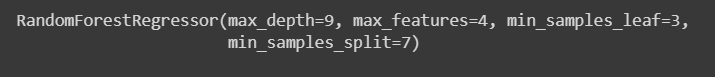
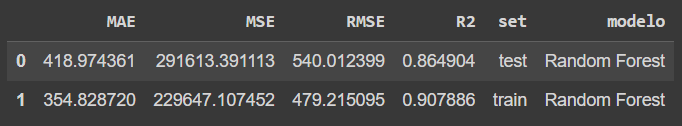

In [188]:
import pickle

In [189]:
#with open("bosque_86-90.pkl", "wb") as fp:
    #pickle.dump(bosque, fp)